In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import glob

In [2]:
#loading train
try:
    # Works in regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Fallback for Jupyter or interactive environments
    current_dir = os.getcwd()
# Go up one level
project_root = os.path.dirname(current_dir)
# Results folder path
results_path = os.path.join(project_root, "results")
print(results_path)
# Load forecast and validation datasets
validation_path = os.path.join(results_path, "validationtimegpt.parquet")
forecast_folder = os.path.join(project_root, "forecast_batches_legacy")  # or wherever your forecast files are stored
forecast_pattern = "forecast_batch_mae_sliced_*.parquet"


/home/sc.uni-leipzig.de/da22digu/kndvi-prediction-challenge-baseline-submission-25/results


In [3]:
forecast_files = glob.glob(os.path.join(forecast_folder, forecast_pattern))
print(f"Found {len(forecast_files)} forecast files.")

forecast_df = pd.concat([pd.read_parquet(f) for f in forecast_files], ignore_index=True)


Found 11 forecast files.


In [4]:
forecast_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-92,TimeGPT-lo-92
0,100000,2020-02-21,0.026807,0.207347,-0.153733
1,100000,2020-02-29,0.028649,0.290159,-0.232861
2,100000,2020-03-08,0.029111,0.301099,-0.242877
3,100000,2020-03-16,0.033027,0.327957,-0.261902
4,100000,2020-03-24,0.030836,0.325699,-0.264027


In [5]:
val_df = pd.read_parquet(validation_path)

In [6]:
val_df.head()

,unique_id,ds,y_true
0,0,2020-02-21,0.458927
1,0,2020-02-29,0.451686
2,0,2020-03-08,0.449505
3,0,2020-03-16,0.459068
4,0,2020-03-24,0.449425


In [7]:
# Ensure they merge on 'unique_id' and 'ds'
merged_df = pd.merge(forecast_df, val_df, on=["unique_id", "ds"], how="inner")


In [8]:
merged_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-92,TimeGPT-lo-92,y_true
0,100000,2020-02-21,0.026807,0.207347,-0.153733,0.017167
1,100000,2020-02-29,0.028649,0.290159,-0.232861,0.019032
2,100000,2020-03-08,0.029111,0.301099,-0.242877,0.007121
3,100000,2020-03-16,0.033027,0.327957,-0.261902,0.006413
4,100000,2020-03-24,0.030836,0.325699,-0.264027,0.010407


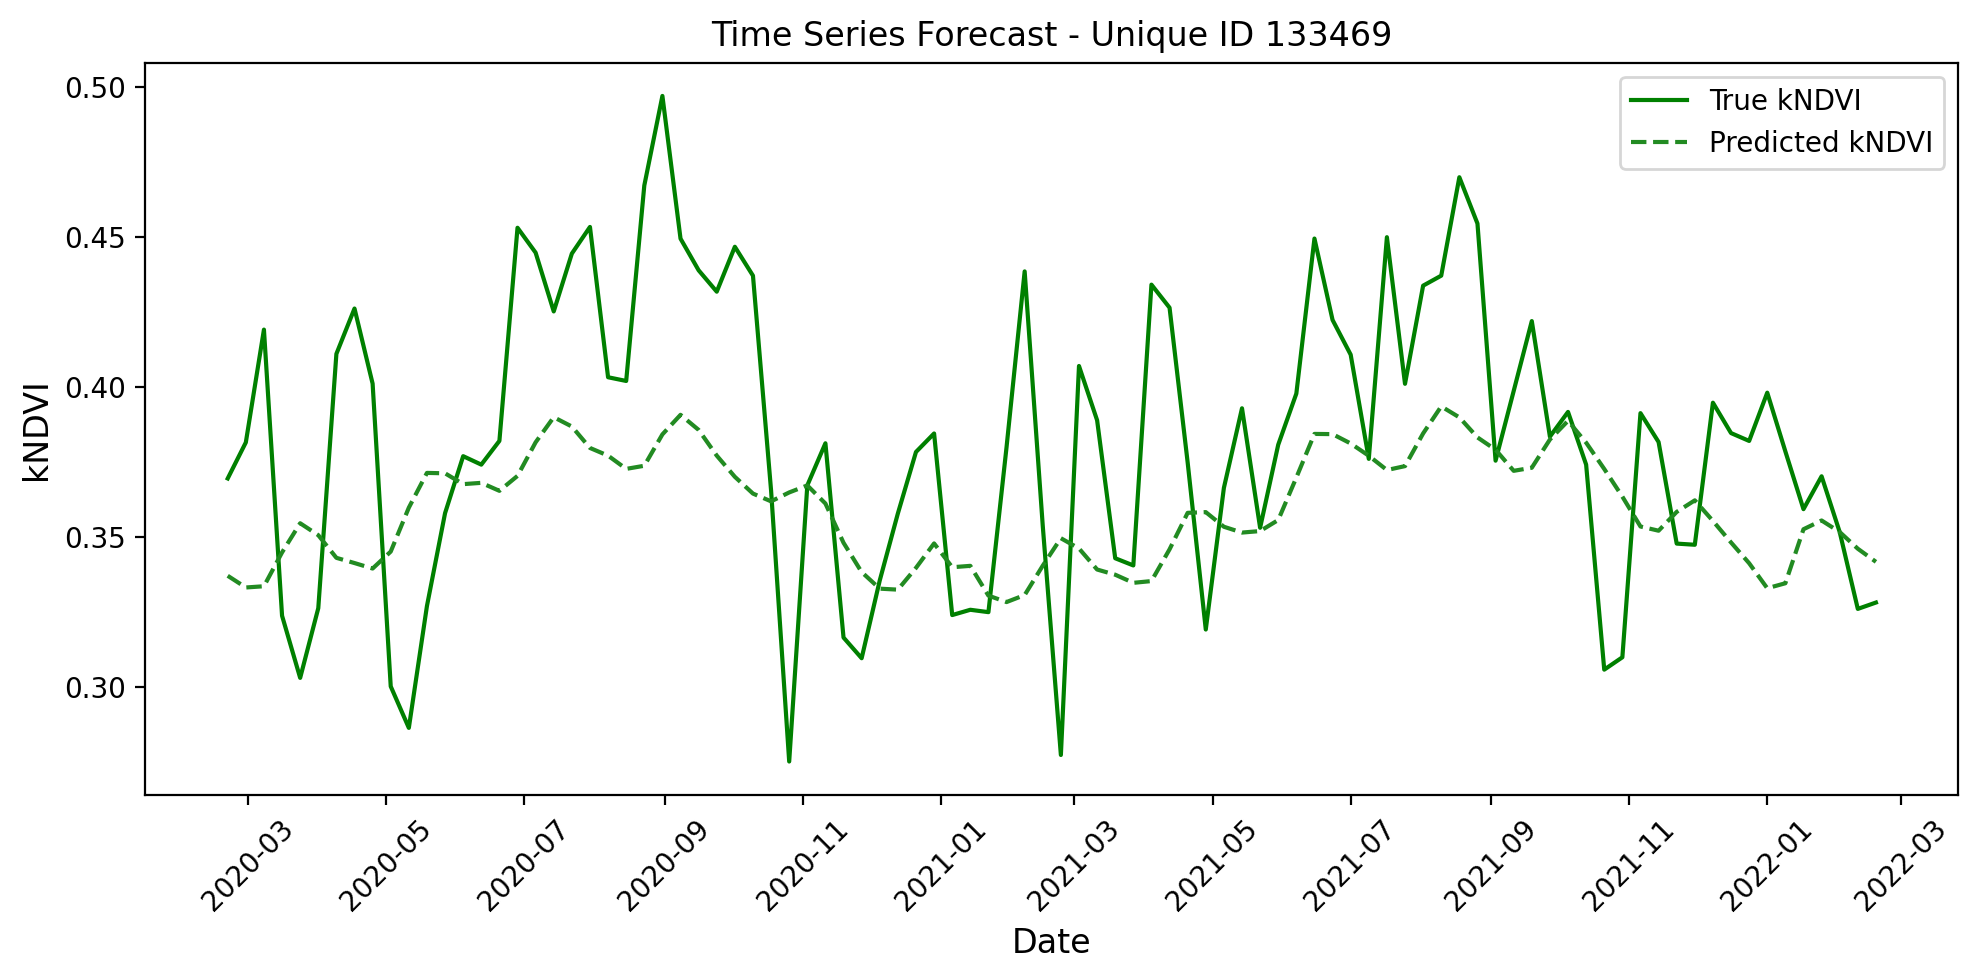

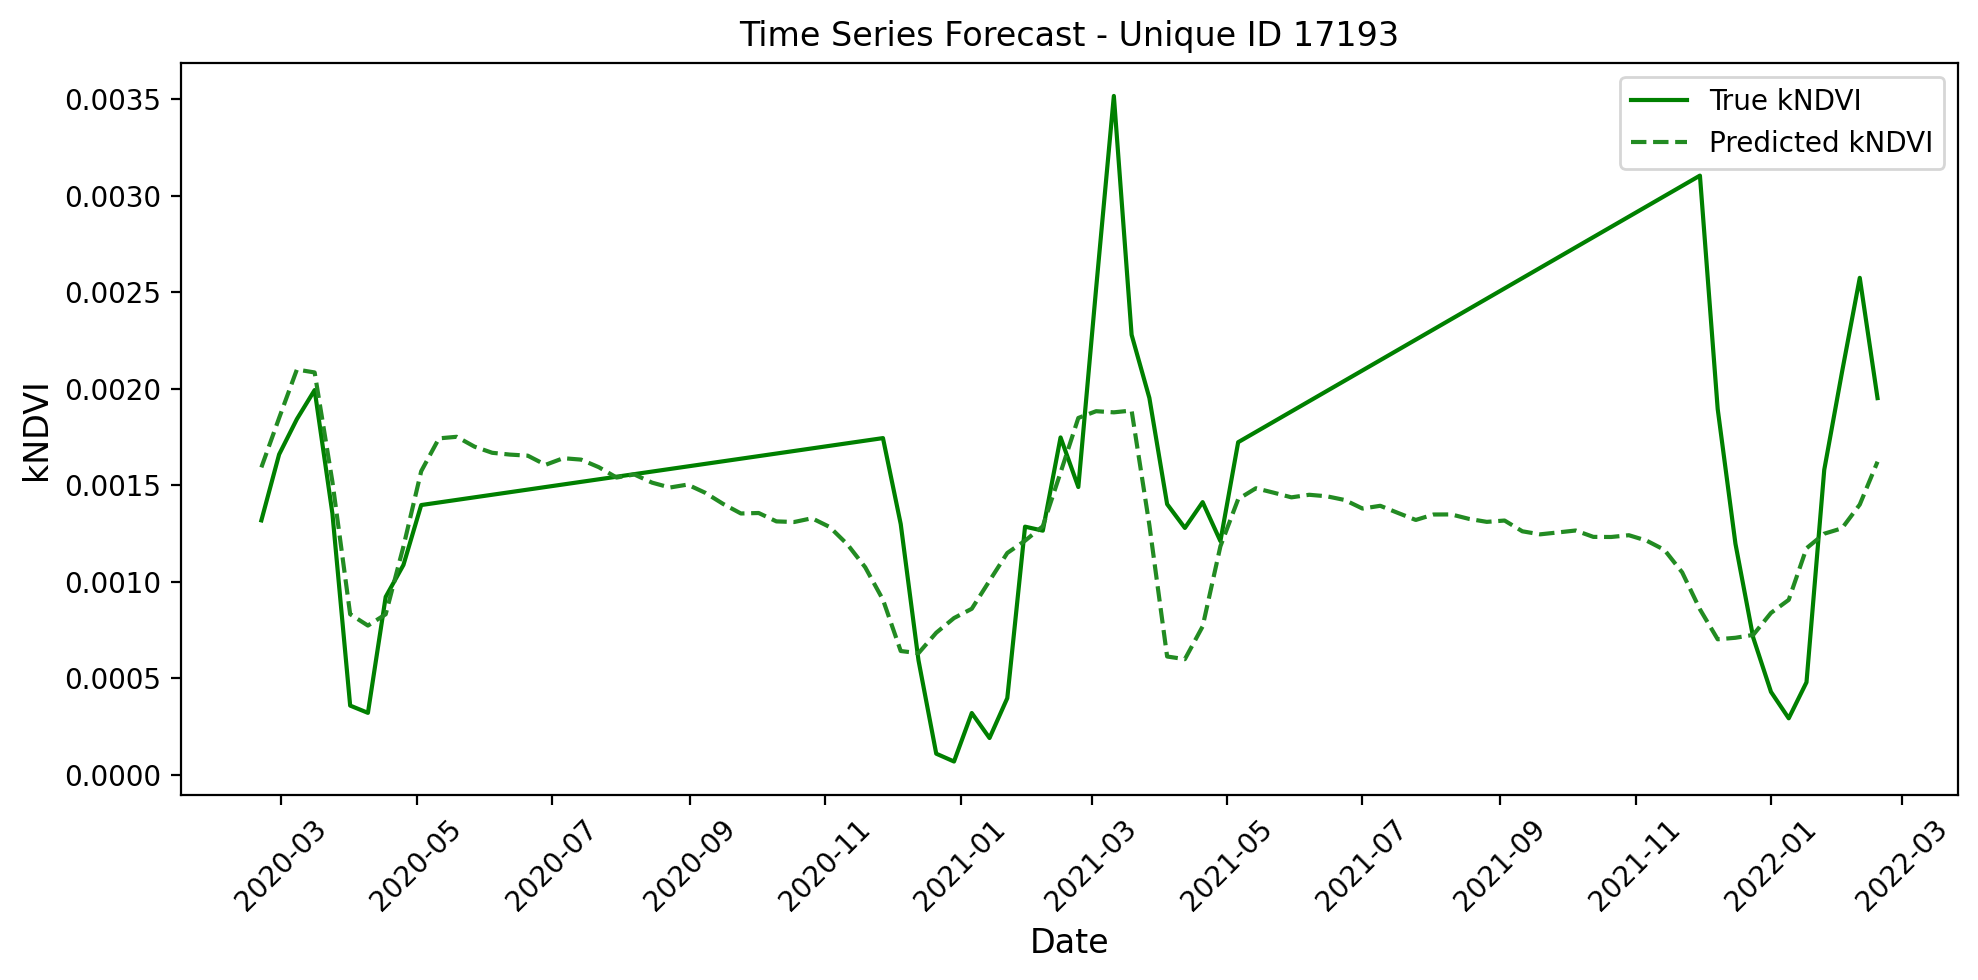

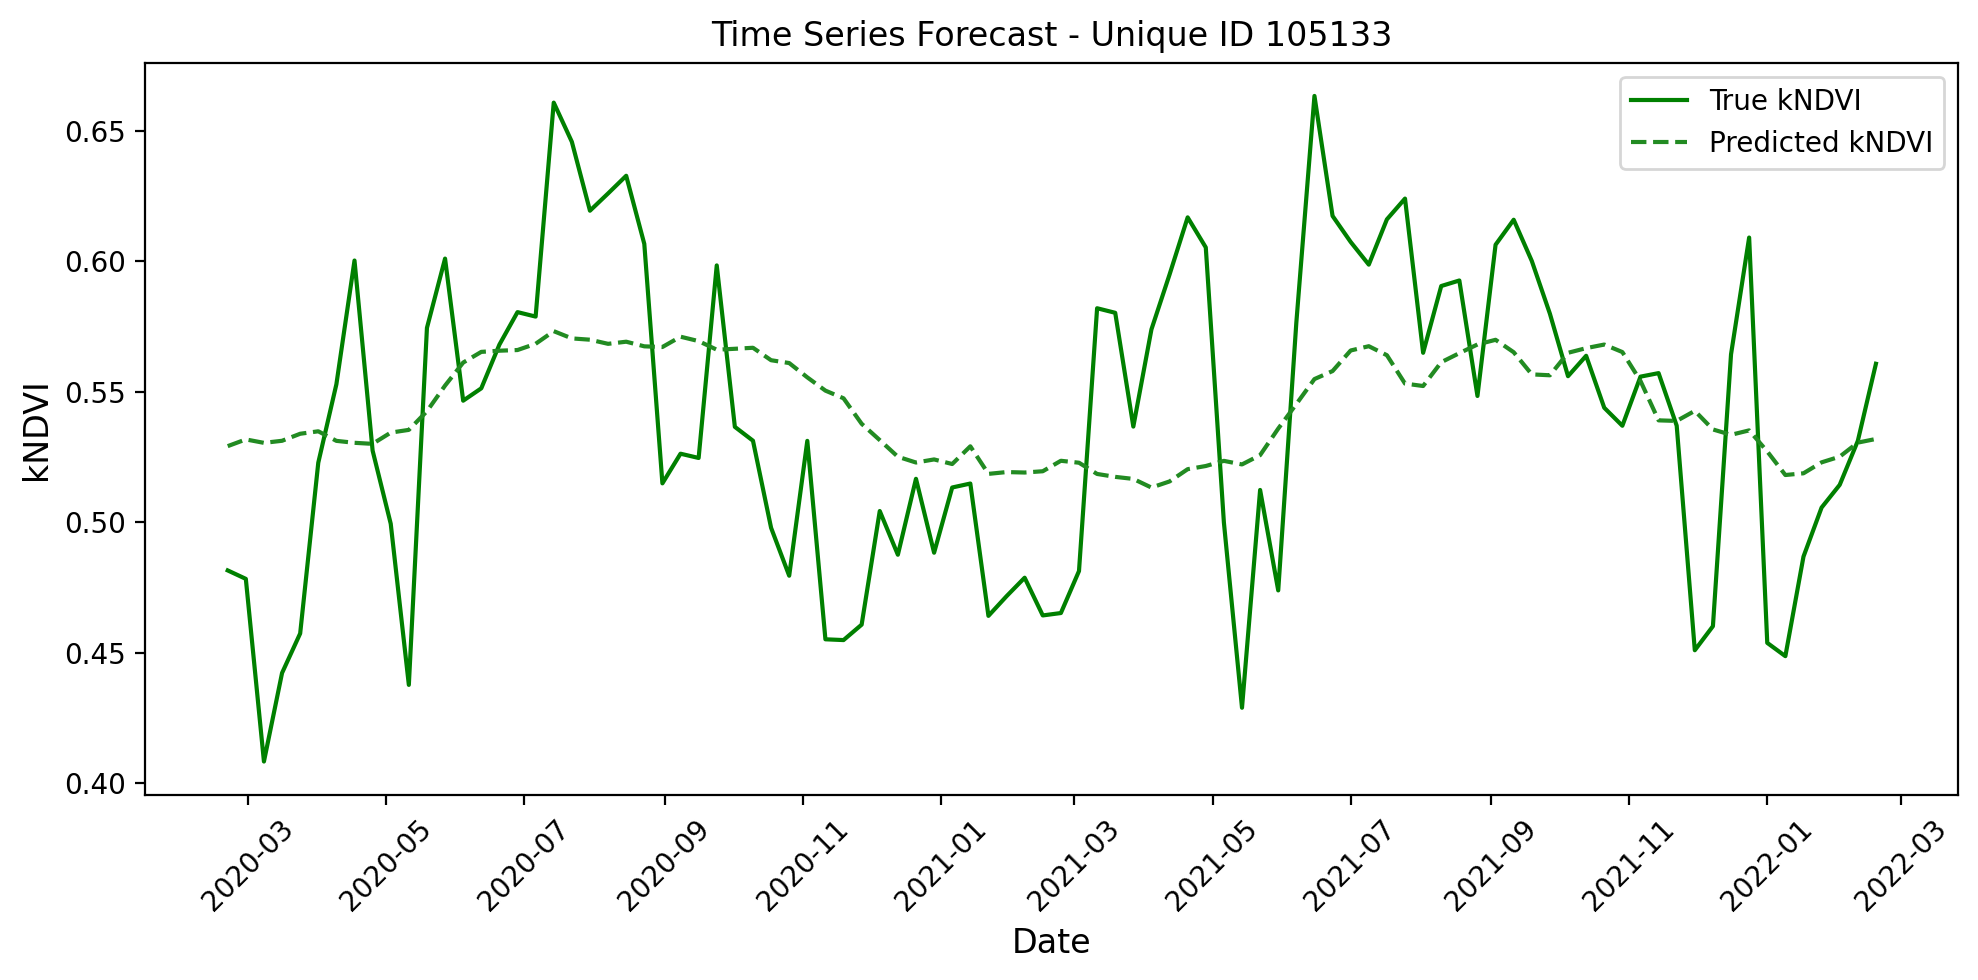

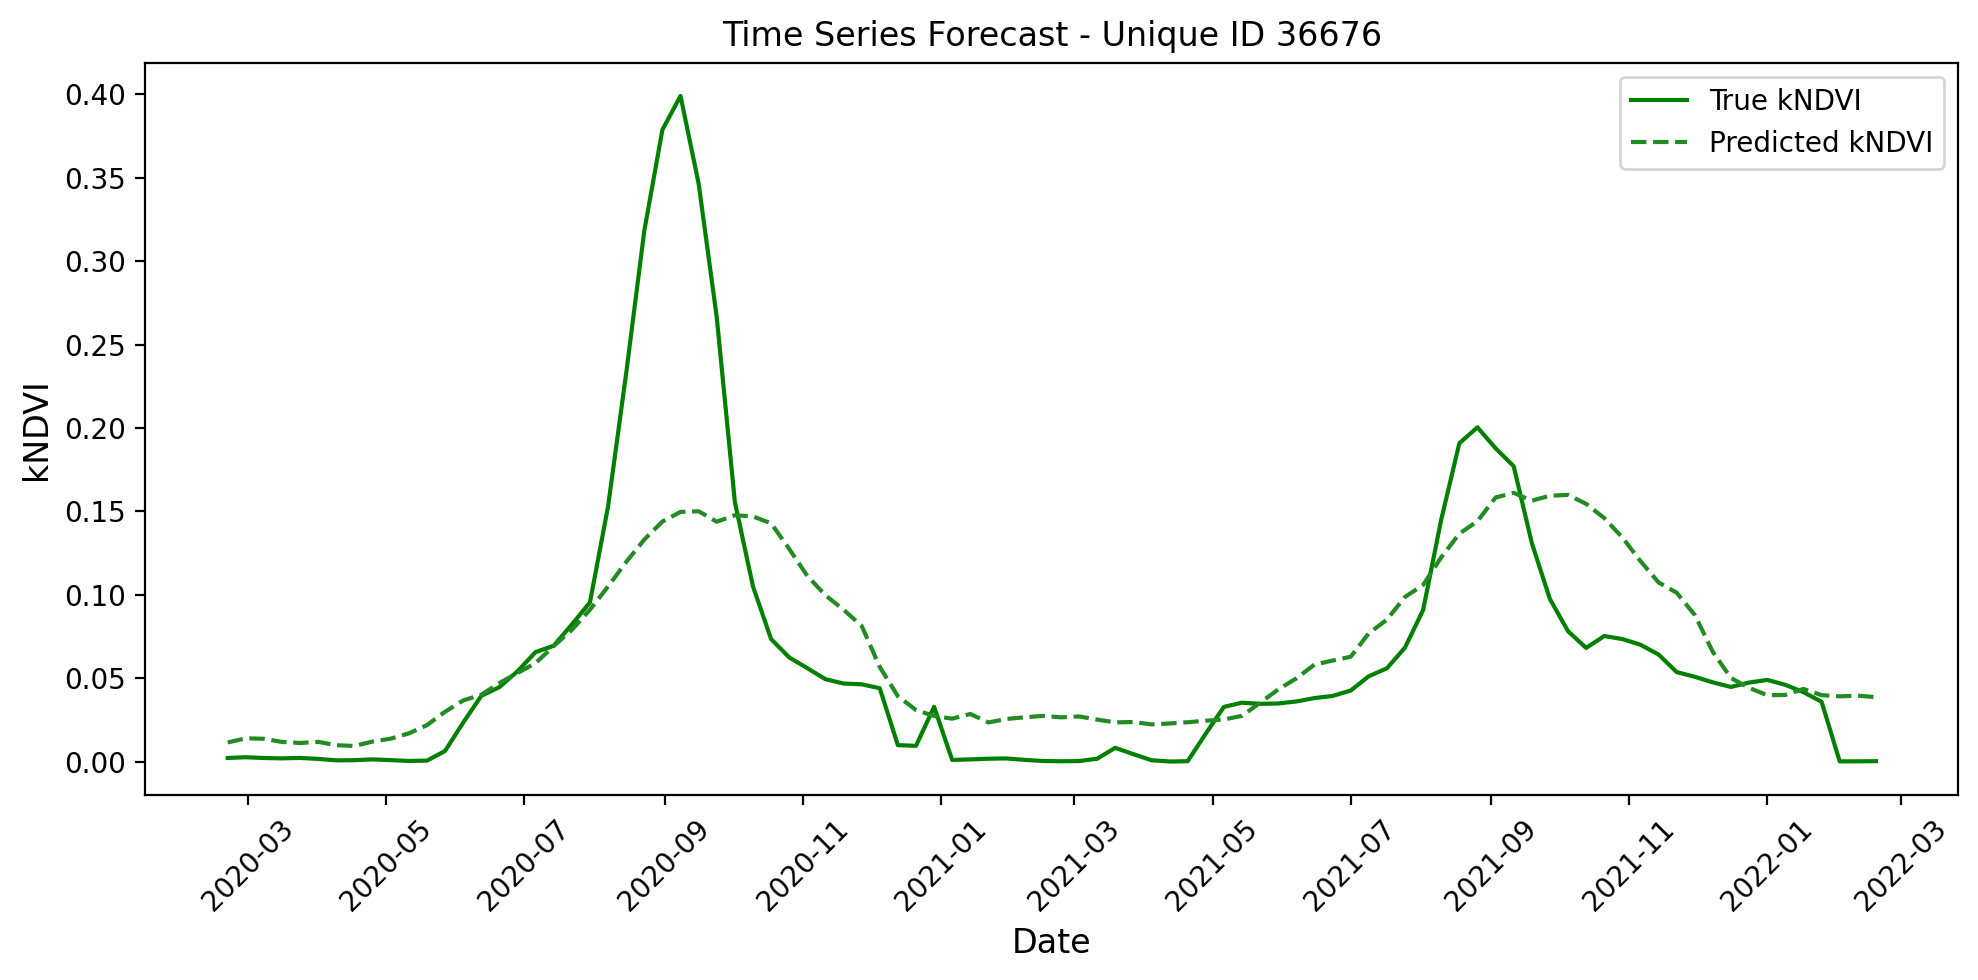

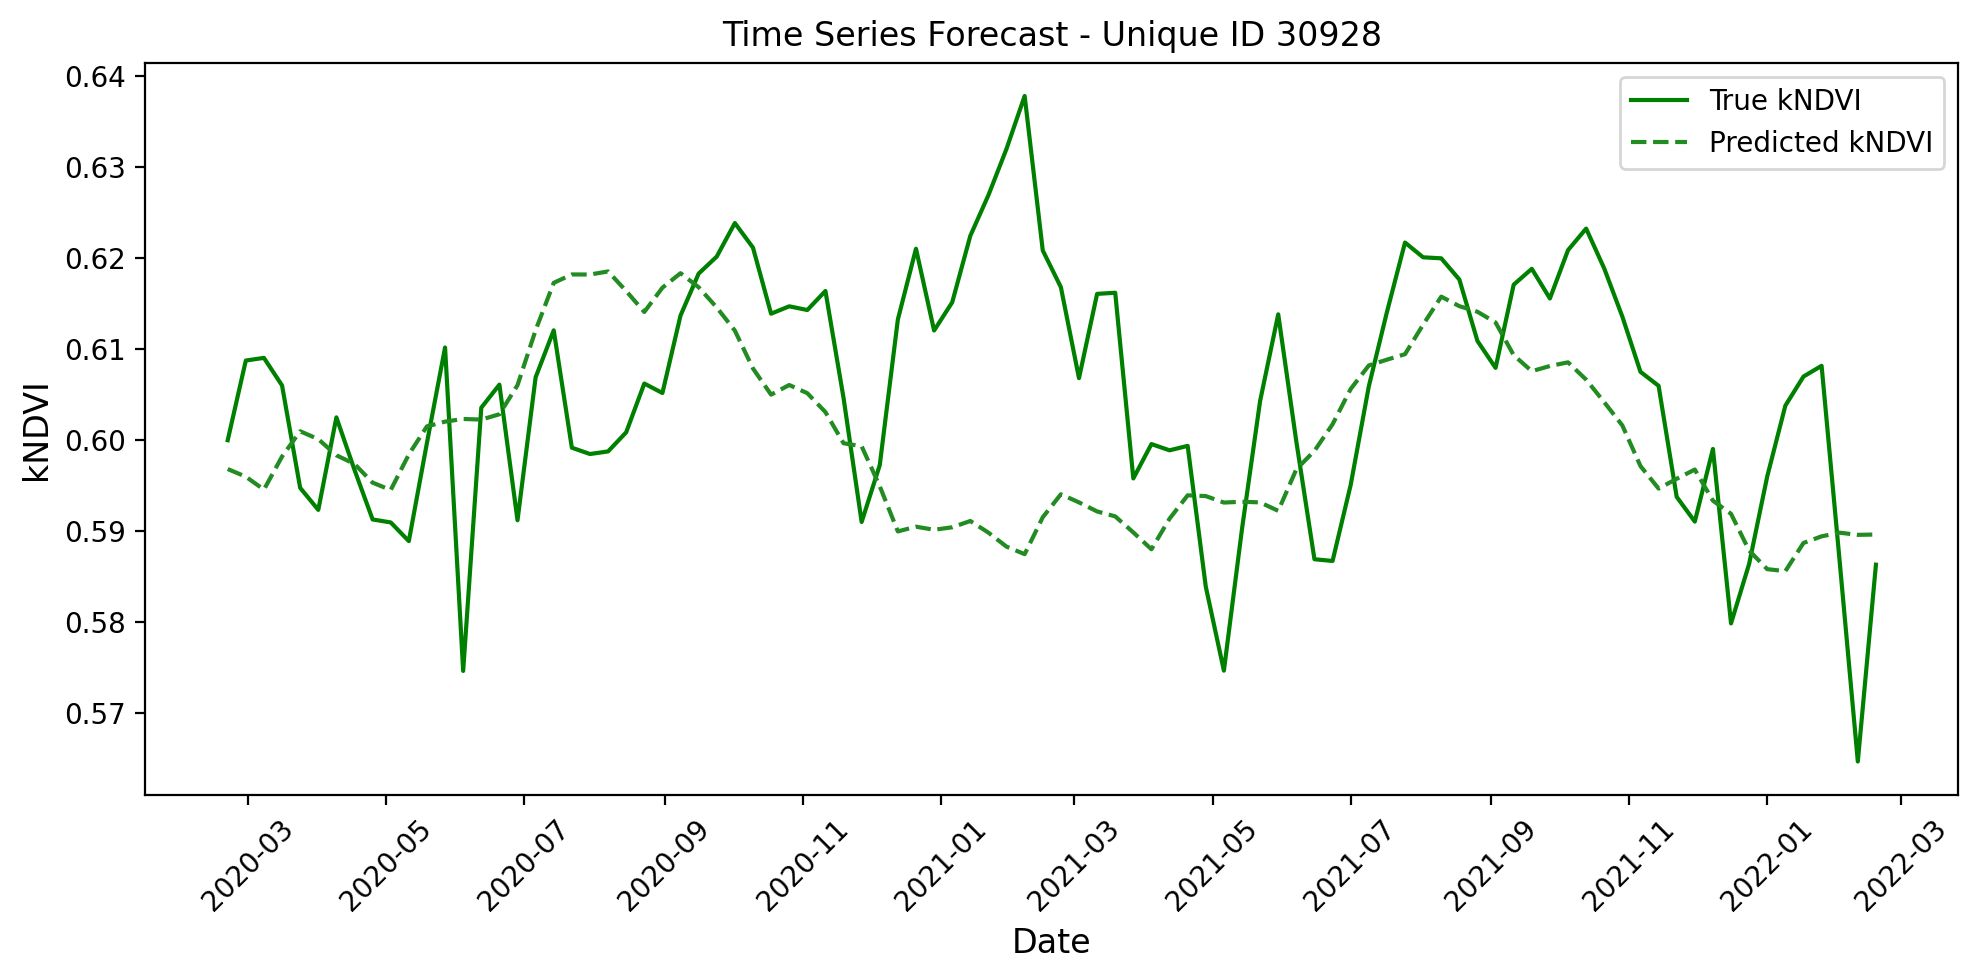

In [9]:
# Pick a few IDs to plot
li = merged_df["unique_id"].drop_duplicates().sample(5, random_state=2).tolist()

true_color = "green"
pred_color = "forestgreen"

for unique_id in li:
    _sub_df = merged_df[merged_df["unique_id"] == unique_id]

    plt.figure(figsize=(10, 5), dpi=200)
    plt.plot(_sub_df["ds"], _sub_df["y_true"], label='True kNDVI', color=true_color)
    plt.plot(_sub_df["ds"], _sub_df["TimeGPT"], label='Predicted kNDVI', color=pred_color, linestyle='--')

    plt.title(f'Time Series Forecast - Unique ID {unique_id}')
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("kNDVI", fontsize=12)
    #plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    #plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{results_path}/figures/{unique_id}_nofinetuning.png")
    plt.show()
